In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, f1_score, mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [3]:
test_df = pd.read_csv("/Users/akshaykekuda/Desktop/CSR-SA/attention_model/overall_score_pred_test.csv")

In [24]:
test_df['pred'] = test_df['pred'].str.strip('[]').astype('float')
test_df['target'] = test_df['target'].str.strip('[]').astype('float')
test_df['id'] = test_df['id'].str.strip('[]\'')

No handles with labels found to put in legend.


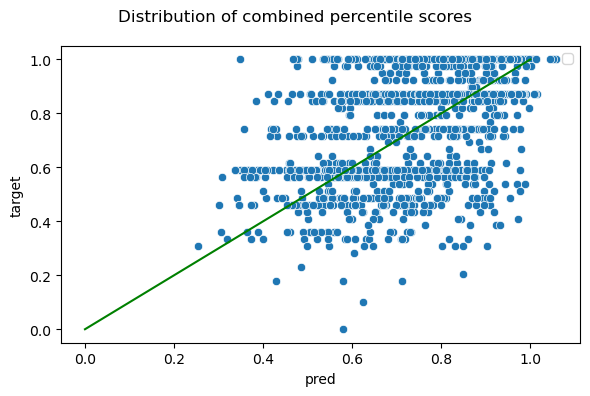

In [72]:
fig, ax = plt.subplots(figsize=(6,4), dpi=100)
ax = sns.scatterplot(data = test_df, x='pred', y='target', ax=ax)
ax = sns.lineplot(x=[0,1], y=[0,1], color='g')
ax.legend()
fig.suptitle("Distribution of combined percentile scores")
fig.tight_layout()
plt.show()

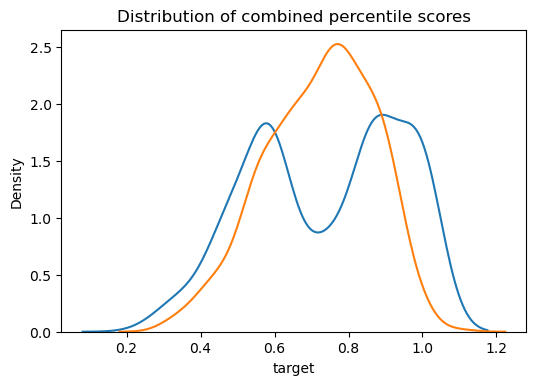

In [33]:
dev_df = pd.read_csv("/Users/akshaykekuda/Desktop/CSR-SA/attention_model/overall_score_pred_dev.csv")

dev_df['pred'] = dev_df['pred'].str.strip('[]').astype('float')
dev_df['target'] = dev_df['target'].str.strip('[]').astype('float')
dev_df['id'] = dev_df['id'].str.strip('[]\'')

plt.figure(figsize=(6,4), dpi=100)
sns.plot(dev_df.target)
sns.plot(dev_df.pred)
plt.title("Distribution of combined percentile scores")
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_df.target, test_df.pred)

In [68]:
from sklearn import metrics
import numpy as np
## Kpi
y_test = 100*test_df.target
predicted = 100*test_df.pred
print("R2 (explained variance):", round(metrics.r2_score(y_test, predicted), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-predicted)/predicted)), 2))
print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", "{:,.0f}".format(np.sqrt(metrics.mean_squared_error(y_test, predicted))))
## residuals
residuals = y_test - predicted
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], predicted[max_idx]
print("Max Error:", "{:,.0f}".format(max_error))

R2 (explained variance): 0.1
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.22
Mean Absolute Error (Σ|y-pred|/n): 15
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 19
Max Error: 65


In [8]:
test_df = pd.read_csv("/Users/akshaykekuda/Desktop/CSR-SA/attention_model/all_subscores_pred_test.csv",index_col=0)

In [35]:
true_df = test_df.iloc[:,test_df.columns.str.startswith('True')]
pred_df = test_df.iloc[:,test_df.columns.str.startswith('Pred')]

In [38]:
for i in range(10):
    print(true_df.columns[i].split()[1])
    print(classification_report(true_df.iloc[:,i], pred_df.iloc[:,i]))

Greeting
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.97      1.00      0.98      1304

    accuracy                           0.97      1351
   macro avg       0.48      0.50      0.49      1351
weighted avg       0.93      0.97      0.95      1351

Professionalism
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.94      1.00      0.97      1274

    accuracy                           0.94      1351
   macro avg       0.47      0.50      0.49      1351
weighted avg       0.89      0.94      0.92      1351

Confidence
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       168
           1       0.88      1.00      0.93      1183

    accuracy                           0.88      1351
   macro avg       0.44      0.50      0.47      1351
weighted avg       0.77      0.88     

/opt/homebrew/Caskroom/miniforge/base/envs/m1_optim/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/m1_optim/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/m1_optim/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [40]:
true_df.apply(lambda x: x.value_counts())

True Greeting  True Professionalism  True Confidence  True Cross Selling  \
0             47                    77              168                 670   
1           1304                  1274             1183                 681   

   True Retention  True Creates Incentive  True Product Knowledge  \
0             214                     625                     339   
1            1137                     726                    1012   

   True Documentation  True Education  True Processes  
0                 129             593             704  
1                1222             758             647

In [89]:
test_df = pd.read_csv("/Users/akshaykekuda/Desktop/CSR-SA/attention_model/best_model/07/all_subscores_pred_test.csv")

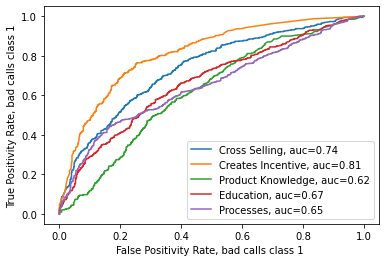

In [90]:
scoring_criteria = ['Cross Selling', 'Creates Incentive', 'Product Knowledge', 'Education', 'Processes']
for crit in scoring_criteria:
    test_df['RawPred ' + crit] = test_df['RawPred ' + crit].apply(lambda s : float(s[s.find("(")+1:s.find(")")]))
    y_pred_proba = test_df['RawPred ' + crit]
    y_true = test_df['True ' + crit]
    fpr, tpr, _ = metrics.roc_curve(y_true,  y_pred_proba)
    auc = metrics.roc_auc_score(y_true, y_pred_proba).round(2)
    plt.plot(fpr,tpr,label="{}, auc={}".format(crit, auc))
    plt.xlabel("False Positivity Rate, bad calls class 1 ")
    plt.ylabel("True Positivity Rate, bad calls class 1")
    plt.legend(loc=4)
plt.show()

In [110]:
import pickle
f = open("/Users/akshaykekuda/Desktop/CSR-SA/attention_model/best_model/all_subscores_pred_test.p", "rb")
test_df = pickle.load(f)

In [139]:
new = test_df.sort_values(by='text', key=lambda x: x.apply(lambda y: len(y)))

In [168]:
for i in range(5):
    df = pd.DataFrame()
    matrix = new.iloc[i]['scores']
    df['text'] = new.text.iloc[i]
    df['scores'] = np.sum(matrix, axis=0)
    df['lens'] = df.text.apply(lambda x: len(x.split(' ')))
    print(df.sort_values(by='scores'))

                                                 text    scores  lens
8                                           yeah well  0.289646     2
2                   um they are trying to this was um  0.292146     8
7                      three six eight six seven five  0.295044     6
6                                  say zero zero zero  0.309306     4
5   mm okay get your bills i need the a claim numb...  0.329525    20
4   the i was getting that you guys were telling t...  0.330452    30
3   they are trying to say that i did not have cov...  0.386642    39
9                        nice nice little one and not  0.457605     6
0   hello i am purchasing safe auto insurance my i...  0.517399    21
1   i had a claim awhile ago um electing march sev...  1.194595    14
10  ok some see the the adjuster and go claim it i...  6.597641    19
                                                 text    scores  lens
0                                                  uh  0.571341     1
5                   

In [37]:
hsan_f = open("/Users/akshaykekuda/Desktop/CSR-SA/yelp_han/logs/hsan/pred_test.p", "rb")
han_f = open("/Users/akshaykekuda/Desktop/CSR-SA/yelp_han/logs/han/pred_test.p", "rb")
attn_f = open("/Users/akshaykekuda/Desktop/CSR-SA/yelp_han/logs/gru_attention/pred_test_gru_attention.p", "rb")
test_df_hsan = pickle.load(hsan_f)
test_df_han = pickle.load(han_f)
test_df_hsan = test_df_hsan.sort_values(by='text', key=lambda x: x.apply(lambda y: len(y)))
test_df_han = test_df_han.sort_values(by='text', key=lambda x: x.apply(lambda y: len(y)))
gru_attn_df = pickle.load(attn_f)
gru_attn_df = gru_attn_df.sort_values(by='text', key=lambda x: x.apply(lambda y: len(y)))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/akshaykekuda/Desktop/CSR-SA/yelp_han/logs/han/pred_test.p'

In [35]:
np.sum(test_df_hsan.scores[0], axis=0)

array([1.5423689, 1.5901854, 1.3137591, 1.8268805, 1.7268059, 0.       ,
       0.       , 0.       ], dtype=float32)

In [24]:
test_df_hsan[test_df_hsan.text.apply(lambda x:len(x))==4]

Pred Category  True Category  RawPred Proba  \
1025              0              0       0.880795   
6047              0              0       0.880795   
1024              1              1       0.880796   
6046              0              1       0.880795   
1026              1              1       0.880796   
1027              0              0       0.880795   
4321              0              0       0.880795   
4322              1              1       0.880796   
6045              0              1       0.880795   
6044              1              1       0.880796   
2843              1              1       0.880796   
5192              0              0       0.880795   
2842              1              1       0.880796   
5195              1              1       0.880796   
5194              0              0       0.880795   
2841              1              1       0.880796   
2840              0              0       0.880795   
4323              0              0       0.880795   
5193              1              1       0.880796   
4320              0              0       0.880795   

                                                   text  \
1025  [very small portions, inattentive wait staff, ...   
6047  [stopped in tonight for a quick beer after yog...   
1024  [one of my favorite spots in boston, the owner...   
6046  [excellent food went to a friends birthday par...   
1026  [i have been super stressed out having no phon...   
1027  [found out today that the traditional serving ...   
4321  [i have had their meatball sub a few times its...   
4322  [we really like the bunk beds here and the clo...   
6045  [nice atmosphere friendly staff and a tolerabl...   
6044  [beautiful property with a simple fun golf cou...   
2843  [outstanding service and delicious food we ord...   
5192  [not ordering again, over an hour for delivery...   
2842  [my go to nail salon in winter garden, i do no...   
5195  [kendall is the greatest dance teacher of all ...   
5194  [had an epiphany, this is the dallas alamo tha...   
2841  [check in ver easy and fast, hotel as a whole ...   
2840  [this place is close to my home, i tried it on...   
4323  [ok for relatively uninspired food and overly ...   
5193  [this joint is super rad and i love the old fa...   
4320  [poor service try to sell whole bottle of wine...   

                                                 scores  
1025  [[0.2273298, 0.26679355, 0.23514289, 0.2707338...  
6047  [[0.25987154, 0.24577722, 0.25347865, 0.240872...  
1024  [[0.38200918, 0.11145914, 0.30197343, 0.204558...  
6046  [[0.15956095, 0.14381082, 0.26852384, 0.428104...  
1026  [[0.5592499, 0.21626705, 0.12658438, 0.0978987...  
1027  [[0.11958502, 0.22278848, 0.65762657, 0.0], [0...  
4321  [[0.33356977, 0.34372512, 0.32270512, 0.0], [0...  
4322  [[0.30252856, 0.017894153, 0.60922277, 0.07035...  
6045  [[0.3534033, 0.32620367, 0.1689145, 0.15147851...  
6044  [[0.23048139, 0.3166848, 0.25047675, 0.2023570...  
2843  [[0.16723177, 0.20645015, 0.4820086, 0.1443095...  
5192  [[0.2218164, 0.30111983, 0.2576622, 0.2194015]...  
2842  [[0.2747137, 0.24678878, 0.17018528, 0.3083122...  
5195  [[0.1928045, 0.33652392, 0.19584501, 0.2748265...  
5194  [[0.21367127, 0.19395068, 0.405064, 0.18731408...  
2841  [[0.2730584, 0.20994732, 0.21070291, 0.3062913...  
2840  [[0.25739354, 0.24012895, 0.22243676, 0.280040...  
4323  [[0.30920798, 0.30983666, 0.3809554, 0.0], [0....  
5193  [[0.30854577, 0.18174501, 0.2848044, 0.2249048...  
4320  [[0.2871355, 0.36057538, 0.35228908, 0.0], [0....

In [25]:
test_df_han[test_df_han.text.apply(lambda x:len(x))==4]

Pred Category  True Category  RawPred Proba  \
6642              0              0       0.880797   
6643              0              0       0.880797   
3563              1              0       0.880797   
5759              1              1       0.880797   
4547              1              1       0.880797   
4546              0              0       0.880797   
4545              0              1       0.880797   
4544              1              0       0.880792   
4844              1              1       0.880797   
1844              0              1       0.880721   
5756              1              0       0.880797   
5757              0              0       0.880797   
5758              1              1       0.880797   
6641              0              1       0.880797   
6640              1              1       0.880797   
1845              0              0       0.880797   
4845              0              0       0.880797   
3376              1              1       0.880797   
3377              0              0       0.880797   
3562              1              1       0.880797   
4846              1              1       0.880797   
1846              1              1       0.665744   
1847              0              1       0.880797   
3378              1              1       0.880797   
3560              0              0       0.880797   
3561              1              1       0.880797   
4847              1              1       0.880797   
3379              1              1       0.880797   

                                                   text  \
6642  [the place is just average big portions but no...   
6643  [bought some gifts for my gf, lousy staff unfr...   
3563  [i had lee lee, she cut my finger and generall...   
5759  [best place, i have been going for about7 year...   
4547  [really helpful knowledgeable staff, repairs c...   
4546  [this is my first and last time dining here, s...   
4545  [well it is the only place in town for a real ...   
4544  [ahh the red line, if you are here you already...   
4844  [stunning collection, very uniquely curated ex...   
1844  [it was good burgers but service was not impre...   
5756  [guac was pretty good tacos were awful the ref...   
5757  [the food that i wound up with was quite tasty...   
5758  [awesome service great food, cool experience, ...   
6641  [this hotels has such potential, too bad that ...   
6640  [this gym has lots of new machines many classe...   
1845  [delivery took forever, the driver called me t...   
4845  [marginal food and service, not sure what woul...   
3376  [the servers were super friendly and welcoming...   
3377  [the worst chinese restaurant i ever been, foo...   
3562  [the service here is over the top enthusiastic...   
4846  [these guys are super fast efficient and profe...   
1846  [i love npr wbur it is on 24 7 unless i have a...   
1847  [this safeway is acceptable considering the fa...   
3378  [mushroom truffle congee, they use hella truff...   
3560  [getting a ride back from the international ai...   
3561  [misfits class carolina get 5 stars, great ins...   
4847  [pretty tasty macaroons that my friend gave me...   
3379  [i just happened to be driving through downtow...   

                                                 scores  
6642                     [0.25, 0.25, 0.25, 0.24999997]  
6643                     [0.24999999, 0.25, 0.25, 0.25]  
3563   [0.25000003, 0.25000006, 0.24999985, 0.25000006]  
5759   [0.26556027, 0.26556027, 0.26556027, 0.20331915]  
4547   [0.25565833, 0.25565833, 0.25565833, 0.23302504]  
4546                           [0.25, 0.25, 0.25, 0.25]  
4545     [0.2500006, 0.24998964, 0.2500085, 0.25000125]  
4544    [0.31894636, 0.31894118, 0.3189461, 0.04316637]  
4844   [0.25000006, 0.25000006, 0.25000006, 0.24999985]  
1844    [0.2880005, 0.28800568, 0.28800985, 0.13598397]  
5756     [0.2500003, 0.24999957, 0.24999982, 0.2500003]  
5757                     [0.25, 0.25, 0.24999999, 0.25]  
57

In [30]:
gru_attn_df[test_df_han.text.apply(lambda x:len(x))==4]

/var/folders/vn/09p5ftzx1590mccq9qkrr0m00000gn/T/ipykernel_1094/1400659882.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gru_attn_df[test_df_han.text.apply(lambda x:len(x))==4]


Pred Category  True Category  RawPred Proba  \
6640              0              0       0.880782   
6641              1              1       0.880788   
6643              1              1       0.880788   
6642              0              0       0.880775   
1845              0              0       0.880782   
1844              1              1       0.880788   
1847              1              1       0.880788   
1846              0              0       0.880782   
5756              1              1       0.880788   
5757              1              1       0.880788   
5758              1              1       0.880788   
5759              1              1       0.880788   
4547              1              1       0.880788   
4546              1              1       0.880788   
4545              0              0       0.880781   
4544              1              1       0.880788   
3379              1              1       0.543921   
3378              1              1       0.880787   
3377              0              0       0.880782   
3376              0              0       0.877003   
3561              0              1       0.880645   
3562              0              0       0.880782   
3563              0              0       0.869090   
3560              0              1       0.880782   
4844              1              1       0.880788   
4845              0              0       0.880782   
4846              0              0       0.880755   
4847              0              0       0.519015   

                                                   text  \
6640  [my friend made the mistake of not reading my ...   
6641  [excelent, i love peruvian cuisine and i have ...   
6643  [very happy to have this place here, the food ...   
6642  [this past friday night a large group of us me...   
1845  [ordered a pizza and a couple of sides online ...   
1844  [this really is a cute little coffee shop, rea...   
1847  [i attended the barre in the park event put on...   
1846  [i highly recommend that you do not use snap f...   
5756  [immerse yourself in a decadent journey, every...   
5757  [delicious donuts that melt in your mouth, i h...   
5758  [i have been here twice and have been thorough...   
5759  [went on a double date, wonderful time, we wen...   
4547  [patricia b introduced me to btone, i love eve...   
4546  [this place is a great spot for friends to han...   
4545  [if you do not mind the nail tech leaving you ...   
4544  [i tried to bring someone here to buy him a gi...   
3379  [why would you call yourself this when you are...   
3378  [atmosphere is not worth talking about but if ...   
3377  [wow has things changed, the spicy pork meatba...   
3376  [the food is just okay, i find it to be really...   
3561  [if you want to getup it is that are slightly ...   
3562  [wow, i love this place go now then obviously ...   
3563  [nice track design but very poor maintenance, ...   
3560  [i want to give this one four stars for the fo...   
4844  [first time here and my hubby loves burgers, m...   
4845  [i visited this dealer on june 1st 2013 in hop...   
4846  [after being enticed by the commercials on sun...   
4847  [met with an advisor at rio grande campus whom...   

                                                 scores  
6640  [0.0909091, 0.0909091, 0.0909091, 0.0909091, 0...  
6641  [0.092573516, 0.092573516, 0.092573516, 0.0925...  
6643  [0.10786706, 0.10786706, 0.10786706, 0.1078670...  
6642  [0.09090909, 0.09090909, 0.09090909, 0.0909090...  
1845  [0.09090909, 0.09090909, 0.09090909, 0.0909090...  
1844  [0.119796485, 0.119796485, 0.119796485, 0.1197...  
1847  [0.13258502, 0.13258502, 0.13258502, 0.1325850...  
1846  [0.090918034, 0.090918034, 0.090918034, 0.0909...  
5756  [0.09736463, 0.09736463, 0.09736463, 0.0973646...  
5757  [0.116904065, 0.116904065, 0.116904065, 0.1169...  
5758  [0.083333336, 0.083333336, 0.083333336, 0.0833...  
5759  [0.083333336, 0.083333336, 0.083333336, 0.0833...  
45

In [173]:
new = test_df.sort_values(by='text', key=lambda x: x.apply(lambda y: len(y)))
for i in range(1):
    df = pd.DataFrame()
    matrix = new.iloc[i]['scores']
    df['text'] = new.text.iloc[i]
    df['scores'] = np.sum(matrix, axis=0)
    df['lens'] = df.text.apply(lambda x: len(x.split(' ')))
    print(df.sort_values(by='scores'))

                                                text    scores  lens
0                                very small portions  0.857224     3
2  far too over priced for the quality and the qu...  0.880180    10
1                             inattentive wait staff  1.095995     3
3  after dinner and 150 my wife and i went to tac...  1.166602    15


In [203]:
i = np.random.choice(range(0,8000))
print(new.loc[i].text)
print(np.sum(new.loc[i].scores, axis=0))

['gone downhill', 'way way way overpriced', 'used to love this place', 'good food owners that would stop by and say hi and treat you to an appetizer great service', 'went last week to celebrate a birthday and was very very disappointed', 'the food was just ok and the prices which used to be high but not outrageous were sky high', '25 for chicken parmesan and you had to pay extra to get pasta on the side 8 or 9 for caesar salad that was made with barely cut up iceberg lettuce', 'service was just ok no personal touches', 'do not mind paying a higher price for great food and great service but honestly carrabbas or olive garden would have had comparable food and much better prices', 'even the atmosphere has changed', 'it has lost the charm and feel of a new york style italian restaurant', 'this used to be our go to place for special occasions but we will not be back', 'try alfredo s on cheshire bridge for a more authentic affordable and tasty italian meal', '', '', '', '', '', '']
[2.09832

In [208]:
print('\n'.join(new.loc[i].text))

gone downhill
way way way overpriced
used to love this place
good food owners that would stop by and say hi and treat you to an appetizer great service
went last week to celebrate a birthday and was very very disappointed
the food was just ok and the prices which used to be high but not outrageous were sky high
25 for chicken parmesan and you had to pay extra to get pasta on the side 8 or 9 for caesar salad that was made with barely cut up iceberg lettuce
service was just ok no personal touches
do not mind paying a higher price for great food and great service but honestly carrabbas or olive garden would have had comparable food and much better prices
even the atmosphere has changed
it has lost the charm and feel of a new york style italian restaurant
this used to be our go to place for special occasions but we will not be back
try alfredo s on cheshire bridge for a more authentic affordable and tasty italian meal








In [282]:
attn_f = open("/Users/akshaykekuda/Desktop/CSR-SA/yelp_han/logs/gru_attention/pred_test_gru_attention.p", "rb")
gru_attn_df = pickle.load(attn_f)

In [283]:
hsan_f = open("/Users/akshaykekuda/Desktop/CSR-SA/yelp_han/logs/hsan/pred_test.p", "rb")
test_df_hsan = pickle.load(hsan_f)

In [284]:
a = gru_attn_df.text.apply(lambda x: ''.join(x))
b = test_df_hsan.text.apply(lambda x: ''.join(x))

In [285]:
new_arr=[]
attn_score_df = pd.DataFrame()
for idx1, text1 in enumerate(a):
    for idx2, text2 in enumerate(b):
        if text1==text2:
            new_arr.append(idx2)

In [286]:
len(new_arr)

8000

In [287]:
test_df_hsan = test_df_hsan.loc[new_arr].reset_index(drop=True)
test_df_hsan.head()

Pred Category  True Category  RawPred Proba  \
0              1              1       0.880796   
1              1              1       0.880796   
2              0              0       0.880795   
3              1              1       0.880796   
4              0              0       0.880795   

                                                text  \
0  [we were pleasantly surprised by the 4corners ...   
1  [reviewing seaworld as i was there for work fo...   
2  [now borders is closing, that was my last reas...   
3  [amazing amazing food, pretty damn affordable ...   
4  [i was on my way to grocery shopping and saw t...   

                                              scores  
0  [[0.26594597, 0.21080239, 0.17735563, 0.130050...  
1  [[0.11303548, 0.081289336, 0.08885678, 0.08310...  
2  [[0.18533255, 0.2192545, 0.25240695, 0.1524599...  
3  [[0.13759218, 0.16902421, 0.012399639, 0.06592...  
4  [[0.25972924, 0.09409406, 0.19890015, 0.123959...

In [288]:
gru_attn_df.head()

Pred Category  True Category  RawPred Proba  \
0              1              1       0.880772   
1              1              1       0.858493   
2              0              0       0.880744   
3              1              1       0.879956   
4              0              0       0.880078   

                                                text  \
0  [we were pleasantly surprised by the 4corners ...   
1  [reviewing seaworld as i was there for work fo...   
2  [now borders is closing, that was my last reas...   
3  [amazing amazing food, pretty damn affordable ...   
4  [i was on my way to grocery shopping and saw t...   

                                              scores  
0  [0.0485072, 0.048496842, 0.048510313, 0.048536...  
1  [0.01879676, 0.018444866, 0.018412896, 0.01839...  
2  [0.14121395, 0.14659299, 0.14553016, 0.1467838...  
3  [0.05266623, 0.052665234, 0.052699212, 0.05272...  
4  [0.103972845, 0.13003011, 0.12502448, 0.098075...

<AxesSubplot:>

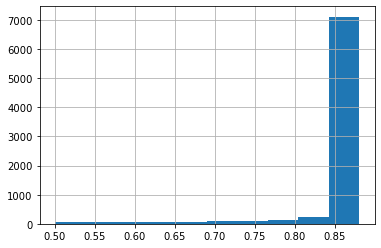

In [289]:
gru_attn_df['RawPred Proba'].hist()

<AxesSubplot:>

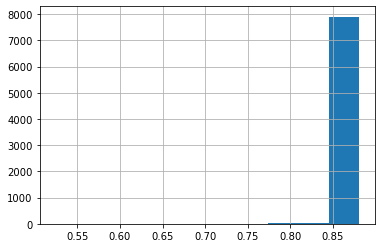

In [290]:
test_df_hsan['RawPred Proba'].hist()

AUC = 0.37
AUC = 0.85


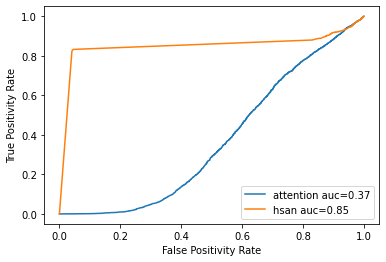

In [214]:
y_pred_proba = gru_attn_df['RawPred Proba']
y_true = gru_attn_df['True Category']
fpr, tpr, _ = metrics.roc_curve(y_true, y_pred_proba)
auc = metrics.roc_auc_score(y_true, y_pred_proba).round(2)
print("AUC = {}".format(auc))
plt.plot(fpr, tpr, label="attention auc={}".format(auc))

y_pred_proba = test_df_hsan['RawPred Proba']
y_true = test_df_hsan['True Category']
fpr, tpr, _ = metrics.roc_curve(y_true, y_pred_proba)
auc = metrics.roc_auc_score(y_true, y_pred_proba).round(2)
print("AUC = {}".format(auc))
plt.plot(fpr, tpr, label="hsan auc={}".format(auc))
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.legend(loc=4)
plt.show()

(0.0, 1.0, 0.0, 1.0)

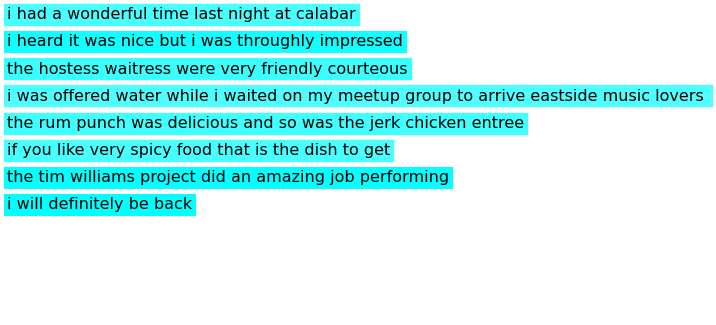

In [299]:
i = np.random.choice(range(0,8000))
text = test_df_hsan.loc[i].text
text.reverse()
score = np.flip(np.sum(test_df_hsan.loc[i].scores, axis=0))
score = (score-np.min(score))/np.max(score)
fig, ax = plt.subplots()
for idx, (a, b) in enumerate(zip(text, score)):
    t = ax.text(0, idx/8, a, fontsize=16)
    t.set_bbox(dict(facecolor='cyan', alpha=b.item(), edgecolor='white'))
ax.axis('off')

# text = gru_attn_df.loc[i].text
# text.reverse()
# score =np.flip(gru_attn_df.loc[i].scores)
# fig, ax = plt.subplots()
# for idx, (a, b) in enumerate(zip(text, score)):
#     t = ax.text(0, idx/8, a, fontsize=16)
#     t.set_bbox(dict(facecolor='cyan', alpha=b.item(), edgecolor='white'))
# ax.axis('off')
# plt.show()

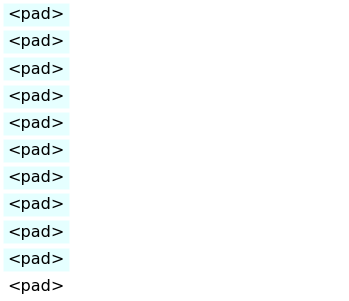

In [325]:
f = open("/Users/akshaykekuda/Desktop/CSR-SA/yelp_han/logs/gru_attention_test/pred_test_gru_attention.p", "rb")
gru_attn_df = pickle.load(f)
text = gru_attn_df.loc[4343].text
text.reverse()
score =np.flip(gru_attn_df.loc[400].scores)
fig, ax = plt.subplots()
for idx, (a, b) in enumerate(zip(text, score)):
    t = ax.text(0, idx/8, a, fontsize=16)
    t.set_bbox(dict(facecolor='cyan', alpha=b.item(), edgecolor='white'))
ax.axis('off')
plt.show()

In [239]:
score

array([0.4120592 , 0.7264944 , 0.3878699 , 0.3505514 , 0.48757207,
       1.        , 0.30937845, 0.        , 0.        ], dtype=float32)

In [511]:
import pickle
import pandas
attn_f = open("/Users/akshaykekuda/Desktop/CSR-SA/attention_model/logs/test/all_subscores_pred_test.p", "rb")
df = pickle.load(attn_f)
pd.set_option('display.max_colwidth', None)
i = np.random.choice(range(len(df)))
combined_df = pd.DataFrame()
combined_df['text'] = df.text[i]
combined_df['Scores'] = np.sum(df.scores[i], axis=0)
combined_df[~(combined_df.text=='<pad>')]

text  \
0                                                 i can for calling safe auto this is jason how may help you   
1                                                                                                         oh   
2    hey i am evening hey i am my name s uh michael least f a i am kind of looking for uh some car insurance   
3                                  all right ill be happy to help you that sarah what state do you reside in   
4                                                                                          um kokomo indiana   
..                                                                                                       ...   
125                                              okay thank you bye alright no problem answers and safe auto   
126                                                                yeah i know it but that i am had your own   
127                                                              um you know you know what your call will be   
128                                                                                          but then we can   
129                                                             right well she would not it was an s just my   

       Scores  
0    0.999101  
1    0.995049  
2    0.999506  
3    1.000412  
4    1.003427  
..        ...  
125  0.999375  
126  1.001142  
127  1.004633  
128  0.997989  
129  1.002568  

[130 rows x 2 columns]

TypeError: 'numpy.float32' object is not iterable

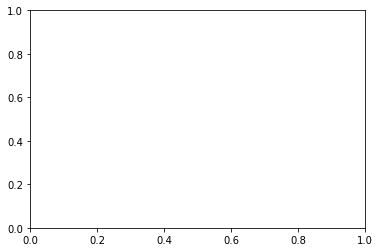

In [313]:
text = new.iloc[6].text
text.reverse()
score = np.flip(np.sum(new.iloc[1].scores, axis=0))
score = (score-np.min(score))/np.max(score)
fig, ax = plt.subplots()
for idx, (a, b) in enumerate(zip(text, score)):
    t = ax.text(0, idx/8, a, fontsize=16)
    t.set_bbox(dict(facecolor='cyan', alpha=b.item(), edgecolor='white'))
ax.axis('off')
plt.show()

In [311]:
new

Pred Cross Selling  Pred Creates Incentive  Pred Product Knowledge  \
626                    0                       0                       0   
922                    0                       0                       0   
726                    1                       1                       1   
767                    1                       0                       1   
757                    0                       0                       0   
...                  ...                     ...                     ...   
541                    0                       0                       0   
297                    1                       1                       0   
1019                   0                       0                       0   
406                    0                       1                       0   
94                     0                       0                       0   

      Pred Education  Pred Processes  True Cross Selling  \
626                0               0                   0   
922                0               0                   0   
726                1               1                   0   
767                1               0                   0   
757                0               0                   0   
...              ...             ...                 ...   
541                0               0                   0   
297                0               1                   0   
1019               0               0                   0   
406                0               0                   0   
94                 0               0                   0   

      True Creates Incentive  True Product Knowledge  True Education  \
626                        0                       0               0   
922                        0                       0               1   
726                        0                       0               0   
767                        0                       0               0   
757                        0                       0               0   
...                      ...                     ...             ...   
541                        0                       1               0   
297                        1                       0               0   
1019                       0                       0               0   
406                        0                       0               0   
94                         0                       0               0   

      True Processes  RawPred Cross Selling  RawPred Creates Incentive  \
626                0               0.036361                   0.011089   
922                0               0.400316                   0.103505   
726                0               0.849174                   0.594809   
767                0               0.588205                   0.100817   
757                0               0.052969                   0.010883   
...              ...                    ...                        ...   
541                0               0.141447                   0.045571   
297                1               0.611016                   0.840394   
1019               0               0.306825                   0.124785   
406                0               0.393408                   0.608392   
94                 0               0.042072                   0.016157   

      RawPred Product Knowledge  RawPred Education  RawPred Processes  \
626                    0.020440           0.084461           0.174242   
922                    0.344831           0.350642           0.326633   
726                    0.807126           0.765050           0.713705   
767                    0.828365           0.518533           0.390902   
757                    0.036071           0.118509           0.184557   
...                         ...                ...                ...   
541                    0.096435           0.165250           0.213245   
297                    0.298641   

In [310]:
test_df_hsan

Pred Category  True Category  RawPred Proba  \
0                 1              1       0.880796   
1                 1              1       0.880796   
2                 0              0       0.880795   
3                 1              1       0.880796   
4                 0              0       0.880795   
...             ...            ...            ...   
7995              0              0       0.880795   
7996              1              1       0.880796   
7997              1              1       0.880796   
7998              1              1       0.880796   
7999              1              1       0.880796   

                                                   text  \
0     [we were pleasantly surprised by the 4corners ...   
1     [, , , , , , , , could not get pablo onto any ...   
2     [now borders is closing, that was my last reas...   
3     [amazing amazing food, pretty damn affordable ...   
4     [i was on my way to grocery shopping and saw t...   
...                                                 ...   
7995  [we made a reservation for a celebratory engag...   
7996  [the food is great but i will always come back...   
7997  [my boyfriend and i ended up at velvet taco on...   
7998  [this place is great, excellent food and servi...   
7999  [i felt like an a list celebrity staying here ...   

                                                 scores  
0     [[0.26594597, 0.21080239, 0.17735563, 0.130050...  
1     [[0.11303548, 0.081289336, 0.08885678, 0.08310...  
2     [[0.18533255, 0.2192545, 0.25240695, 0.1524599...  
3     [[0.13759218, 0.16902421, 0.012399639, 0.06592...  
4     [[0.25972924, 0.09409406, 0.19890015, 0.123959...  
...                                                 ...  
7995  [[0.43610215, 0.23376194, 0.3301359, 0.0, 0.0,...  
7996  [[0.090177685, 0.05927854, 0.8505438, 0.0, 0.0...  
7997  [[0.06591446, 0.083735034, 0.036647815, 0.0710...  
7998  [[0.22384305, 0.22371867, 0.08575919, 0.222048...  
7999  [[0.21007465, 0.18228988, 0.18609262, 0.062549...  

[8000 rows x 5 columns]

In [361]:
import torch
import torch.nn as nn
import math
from torch import softmax

In [470]:
m = nn.MultiheadAttention(2, num_heads=1, batch_first=True)

In [471]:
t = torch.tensor([[[1,2], [3,4], [5,6], [7,8]]], dtype=torch.float)
attn_mask = torch.tensor([[False, False, True, True]])

In [472]:
q=k=v=t

In [473]:
B, Nt, E = q.shape
q = q / math.sqrt(E)
# (B, Nt, E) x (B, E, Ns) -> (B, Nt, Ns)
attn = torch.bmm(q, k.transpose(-2, -1))

In [474]:
if attn_mask is not None and attn_mask.dtype == torch.bool:
    new_attn_mask = torch.zeros_like(attn_mask, dtype=q.dtype)
    new_attn_mask.masked_fill_(attn_mask, float("-inf"))
    attn_mask = new_attn_mask

In [475]:
attn += attn_mask
attn = softmax(attn, dim=-1)

In [476]:
output = torch.bmm(attn, v)

In [477]:
output

tensor([[[2.9717, 3.9717],
         [2.9999, 3.9999],
         [3.0000, 4.0000],
         [3.0000, 4.0000]]])

In [461]:
attn_mask = torch.tensor([[False, False, True, True]])

In [462]:
attn_mask=attn_mask.unsqueeze(-1).expand(-1,-1,output.size(-1))

In [469]:
attn_mask.expand(-1,-1,2)

tensor([[[False, False],
         [False, False],
         [ True,  True],
         [ True,  True]]])

In [494]:
a = torch.tensor([0.5], dtype=torch.float)

In [495]:
softmax(a, dim=0)

tensor([1.])

In [496]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear").fit(X, y)
clf.classes_

array([0, 1])

In [524]:
import pickle
import pandas
attn_f = open("/Users/akshaykekuda/Desktop/CSR-SA/attention_model/logs/test/overall_score_pred_test.p", "rb")
df = pickle.load(attn_f)
pd.set_option('display.max_colwidth', None)
i = np.random.choice(range(len(df)))
combined_df = pd.DataFrame()
combined_df['text'] = df.text[i]
combined_df['Scores'] = np.sum(df.scores[i], axis=0)
combined_df[~(combined_df.text=='<pad>')]

text  \
0        hello this thing for calling safe auto this is eric how can they help you today   
1    that was the one to just see how much ashley asked me going because on this vehicle   
2                                   okay you were looking to get a auto insurance quotes   
3            yeah okay i can definitely help you with that now what state do you live in   
4                                       kentucky do you currently have auto insurance no   
..                                                                                   ...   
124                                                                      in and say like   
125                                                                                 well   
126                                                                           she she is   
127                               uh yeah they should send them to fax mayor because i i   
128                                                            summer but i also have um   

       Scores  
0    1.001561  
1    1.003172  
2    1.000435  
3    1.000738  
4    0.999128  
..        ...  
124  1.000514  
125  0.994294  
126  0.998482  
127  0.997276  
128  0.998311  

[129 rows x 2 columns]

In [2]:
import pandas as pd

In [6]:
s = pd.Series(index=['1', '2', '3'], dtype='object')

In [8]:
s['1'] = [1,2,3]

In [10]:
for idx, val in enumerate(s):
    print(idx)

0
1
2


In [4]:
f = open("/Users/akshaykekuda/Desktop/CSR-SA/attention_model/logs/cs_wo_fbck1/call_score_test.p", "rb")
test_df = pickle.load(f)

In [5]:
test_df.scores = test_df.scores.apply(lambda x: np.sum(x, axis=0))

In [36]:
test_df.columns

Index(['Pred Cross Selling', 'True Cross Selling', 'RawProba Cross Selling',
       'id', 'text', 'scores'],
      dtype='object')

In [44]:
test_df = test_df.set_index('id')

In [10]:
import pandas as pd

In [2]:
sample_df = pd.DataFrame()

In [7]:
sample_df['utterance'] = test_df.iloc[0].text

In [8]:
sample_df['scores'] = test_df.iloc[0].scores

In [62]:
def display(id, df):
    pd.set_option('display.max_colwidth', None)
    combined_df = pd.DataFrame()
    combined_df['Text'] = df.loc[id].text
    combined_df['Scores'] = df.loc[id].scores
    combined_df = combined_df[~(combined_df.Text=='<pad>')].sort_values(by='Scores')
    low_df = combined_df[:10]
    high_df = combined_df[-1:-20:-1]
    return low_df, high_df

In [88]:
test_df.loc['300140672040210202'].scores

array([0.8009255 , 1.2971369 , 0.95298636, 0.7399363 , 0.9119117 ,
       0.4771819 , 0.670708  , 0.8683828 , 2.3062809 , 0.8747128 ,
       0.655544  , 0.7451142 , 0.53969234, 1.4852021 , 1.2349017 ,
       0.5123602 , 0.4925396 , 0.7543584 , 0.8240507 , 0.66341317,
       0.47827592, 1.3060528 , 1.4283994 , 0.74018216, 0.67741686,
       0.71504396, 1.3142948 , 0.8567481 , 1.0179639 , 1.2238922 ,
       0.6299615 , 0.8448891 , 1.0151657 , 1.0812465 , 1.0202056 ,
       1.6340775 , 0.8696441 , 0.6994535 , 1.0937551 , 0.7223209 ,
       1.2425822 , 1.4784652 , 1.221478  , 1.3546231 , 2.2070718 ,
       0.6165645 , 0.9432619 , 1.1544614 , 1.1226237 , 1.2499523 ,
       3.1705353 , 0.63573986, 0.6085692 , 0.6839056 , 0.61925775,
       0.77606726, 2.8486187 , 0.68052596, 0.61873996, 0.80454123,
       1.0576104 , 3.26861   , 1.2753848 , 1.4976715 , 1.0459436 ,
       0.5350393 , 0.8460016 , 1.0310214 , 0.7415524 , 0.6795031 ,
       0.5241498 , 0.96541923, 0.9447048 , 0.9293263 , 0.72228

In [14]:
transcripts_dir = '/Users/akshaykekuda/Desktop/CSR-SA/manual_score_transcriptions/server_transcripts/'

def prepare_score_df(path_to_p, workgroup):
    with open(path_to_p, 'rb') as file:
        df = pickle.load(file)
    df = df.sort_values(by=['RecordingDate', 'QGroupSequence', 'QuestionSequence']).copy()
    cols = ['QGroupSequence', 'QGroupName', 'InteractionIdKey', 'QuestionSequence', 'QuestionText', 'QuestionType',
            'QuestionPromptType', 'QuestionWeight', 'QuestionMin', 'QuestionMax', 'AnswerScore', 'RawAnswer',
            'DisplayAnswer',
            'UserComments']
    if workgroup == 'all':
        calls_df = df[(df.QuestionnaireName == 'Call Interaction') & ((df.WorkgroupQueue == 'Customer Service') 
                                                                      |(df.WorkgroupQueue == 'Sales'))].copy()
    elif workgroup == 'CustomerService':
        calls_df = df[(df.QuestionnaireName == 'Call Interaction') & (df.WorkgroupQueue == 'Customer Service')].copy()
    elif workgroup == 'Sales':
        calls_df = df[(df.QuestionnaireName == 'Call Interaction') & (df.WorkgroupQueue == 'Sales')].copy()

    q_df = calls_df[cols]
    temp = q_df[0:10]
    temp = temp.reset_index(drop=True)
    q_text = []
    for index, row in temp.iterrows():
        q_text.append(row['QuestionText'])

    score_df = pd.DataFrame()
    score_df['WorkgroupQueue'] = calls_df.WorkgroupQueue[::10]
    score_df['RecordingDate'] = calls_df.RecordingDate[::10]
    # change baseline score range accordingly
    # overall score between 0 and 1
    score_df['CombinedPercentileScore'] = (calls_df.CombinedPercentileScore[::10]/100).astype(float).round(4)
    score_df['Category'] = (score_df['CombinedPercentileScore'] < 0.75).apply(lambda x: int(x))
    # overall score between 0 and 100
    # score_df['CombinedPercentileScore'] = (calls_df.CombinedPercentileScore[::10]).astype(float).round(2)
    # score_df['Category'] = (score_df['CombinedPercentileScore'] > 75).apply(lambda x: int(x))
    score_df.index = calls_df.InteractionIdKey[::10]
    calls_df.AnswerScore = calls_df.AnswerScore.astype('int')
    for i in range(10):
        criteria = q_text[i]
        q_max = int(calls_df.QuestionMax.iloc[i])
        score_df[criteria] = (calls_df.AnswerScore[i::10]).values
        score_df[criteria] = score_df[criteria].apply(lambda x: 0 if x >= q_max else 1) #used as binary class
        # score_df[criteria] = score_df[criteria].apply(lambda x: 1 if x >= q_max else 0) #used as binary class
        score_df[criteria + ' Feedback'] = (calls_df.UserComments[i::10]).values
    score_df = score_df.loc[~score_df.index.duplicated(keep='last')]
    print("Dataframe creation done")

    return score_df, q_text


def prepare_trancript_score_df(score_df, q_text, transcripts_dir):
    df = pd.DataFrame(columns=['text', 'file_name'])
    for file in os.listdir(transcripts_dir):
        if file.endswith('.txt'):
            file_loc = transcripts_dir + file
            f = open(file_loc, 'r')
            tscpt = f.read()
            f.close()
            if len(tscpt) == 0:
                print("empty file")
                continue
            id = re.split("_|-|\.", file)[1]
            if id in score_df.index:
                    df.loc[id, score_df.columns] = score_df.loc[id]
                    df.loc[id, ['text', 'file_name']] = [tscpt, file_loc]
    df.loc[:, q_text] = df.loc[:, q_text].astype(int)
    df = df[df['text'].notna()]
    print("Number of Calls = {}".format(len(df)))
    return df


def balance_df(df, num_samples):
    h = df[df.Category == 1].sample(n=num_samples//2)
    l = df[df.Category == 0].sample(n=num_samples//2)
    df_sampled = pd.concat((h,l))
    print("sampled df:", df_sampled.Category.value_counts())
    # h = len(df[df.Category == 1])
    # l = len(df) - h
    # temp = df[df.Category == 1].sample(h -l).index
    # df_sampled = df.drop(temp)
    # print('training and dev sample size = {} good ={} bad ={}'.format(len(df_sampled),l,l))
    # print('test sample size = {}'.format(len(df.loc[temp])))
    # remaining = df.index.difference(temp, sort=False)
    return df_sampled

score_df, q_text = prepare_score_df("/Users/akshaykekuda/Desktop/CSR-SA/attention_model/ScoringDetail_viw_all_subscore.p", 'all')

Dataframe creation done


In [67]:
score_df.loc['200148059040210116']['Cross Selling Feedback']

'Liliana did good job on offering renters insurance, plus the forever car plan and also ask if customer have any recreational vehicles to be insured.'

In [61]:
test_df[(test_df['True Cross Selling'] + test_df['Pred Cross Selling'])==0].index.tolist()

['100162444150210406',
 '100165896150210407',
 '100169264960210601',
 '200154357050210423',
 '300140672040210202',
 '300160973550210513',
 '100199661840200127',
 '300144059140210202',
 '300165666650210514',
 '100141597050210402',
 '300152893650210512',
 '300174459440210208',
 '200148059040210116',
 '2001508664A0191203',
 '300112428520210825',
 '300118655650210505',
 '300180398960200420',
 '300149673440210203',
 '100138637390210722',
 '100135978250210401',
 '100169616660210601',
 '200106086170210302',
 '100127330860210524',
 '100140146550210402',
 '200137688480210305',
 '200155125840210118',
 '2001601687A0191204',
 '100128620560210524',
 '100134991450210401',
 '100182832350210409',
 '100166781560210601',
 '200113520640210111',
 '100159891930210102',
 '200128364970210304',
 '200129396320201002',
 '200176477530210818',
 '200107773460210608',
 '100148815460200309',
 '100133433450210401',
 '200106607540210109',
 '300151246740210203',
 '300140834080200601',
 '100168228360210601',
 '200184881

In [68]:
low, high = display('200148059040210116', test_df)

In [69]:
high

Text  \
21                                                                                                                                                         no   
48                                                                                                                                           a month for that   
42                                             now what type of coverage are you looking for full coverage okay what a five hundred dollar deductible be okay   
49                                                                                                                  tennessee both options actually that yeah   
47                                                                 price difference but like smaller coverages like that are usually like a couple of dollars   
8                                                                                                     okay let us see here okay and then what is your address   
44                                                                                    that that that okay to you yeah okay what do you does that come with it   
63                                                                              five years no mhm and have you been insured with anybody else within the past   
22                                                                                hum occupation was previously lifted ask customer service so that still the   
11                                                                                                 you be interested in renters insurance nerdy have the okay   
7                                                                                                                              zero four seven nine three one   
26                                                    um so we do not run your motor vehicle report unless you purchase the policy so if we get those reports   
54                                                                                              medical expenses accidental deaths or uninsured bodily injury   
64                                                                                  thirty days yes what company are you currently with or have you been with   
43                                                                               or one thousand okay would you like thousand roadside service ten rental car   
41                                        okay and um any other vehicles or recreational vehicles like motorcycles a t v s or are easy like to insure no okay   
57  okay so this would require a down payment of two oh five to start to fifteen months without being like start to get that proof of insurance right away oh   
36                                                                                                                     one g one z for zebra you for elephant   
37                                                                                                                                                     hi for   

      Scores  
21  3.358743  
48  3.292101  
42  2.997362  
49  2.313084  
47  2.214215  
8   1.898496  
44  1.883302  
63  1.854782  
22  1.765448  
11  1.592449  
7   1.522346  
26  1.441374  
54  1.431052  
64  1.386683  
43  1.306794  
41  1.230713  
57  1.164199  
36  1.145096  
37  1.116955

In [75]:
i_m = test_df.scores.apply(lambda x: np.argmax(x))

In [82]:
correct=test_df[test_df['Pred Cross Selling'] == test_df['True Cross Selling']]

In [84]:
i_m = correct.scores.apply(lambda x: np.argmax(x))

In [85]:
[tscpt[i_m[i]] for i, tscpt in enumerate(correct.text)]

['whenever the place in and said there for the',
 'um i am just going to keep everything the way it was like okay well would you do that then it would be a five hundred five hundred deductible rejecting the terror and you did not accidental death rental it shows go ahead',
 'sixteen',
 'are pay this visa master or discover card which do you prefer',
 'your eighty two eight eight',
 'whose name of the title it would be my writer floor yeah it would be ma link for your have you do you want to add a lienholder',
 'pack so those are two separate coverages now where you see a thousand forward slash a thousand or five hundred forward slash five hundred',
 'will be the legal limits of liability and taxes that is thirty thousand per person sixty thousand for accident and twenty five thousand for property',
 'single are you currently employed i am',
 'no no no',
 'christie the will accept things if it was going be the best option so that so that if you if you are able to bump it up in two thous

In [86]:
correct=test_df[(test_df['Pred Cross Selling'] + test_df['True Cross Selling'])==0]
i_m = correct.scores.apply(lambda x: np.argmax(x))
[tscpt[i_m[i]] for i, tscpt in enumerate(correct.text)]

['are pay this visa master or discover card which do you prefer',
 'your eighty two eight eight',
 'whose name of the title it would be my writer floor yeah it would be ma link for your have you do you want to add a lienholder',
 'and she is cathy',
 'no on uh',
 'what is the name of the city',
 'your downpayment today will be a hundred seventy dollars',
 'and your last name bundy b u ending',
 'started documents the forty eight hours to avoid any premium increase or pilots',
 'and i will go is your mobile labs money i have i felt',
 'to me as in zebra jeeze',
 'he does okay',
 'no',
 'mam or or yeah',
 'honey',
 'bye bye',
 'one z as in zebra z as in elephant',
 'i am young i am sam',
 'so it possibly has to on there',
 'then you ever been involved in an put a claim to the insurance company in the past five years',
 'policy started would be seventy dollars we can get you started over the phone with a debit or credit card which do you prefer',
 'now you have also been enrolled in our p

In [44]:
import pandas as pd
import numpy as np 
pd.set_option('display.max_colwidth', None)
df = pd.read_pickle("/Users/akshaykekuda/Desktop/CSR-SA/server_logs/ak_fbck_up3.2_m64_01/call_score_test.p")
df = df.set_index('id')
# df.text = df.text.apply(lambda x: x.insert(0, '<cls>'))

In [47]:
df.text.apply(lambda x: x.insert(0, '<cls>'))

id
100175643180200503    None
300145371120191222    None
200105531250210414    None
100188403940200813    None
100103166450210212    None
                      ... 
300114419280200527    None
100150350440200116    None
2001670163C0200710    None
200120774770210304    None
100142704350210402    None
Name: text, Length: 1017, dtype: object

In [97]:
i=3
df.iloc[i]

Pred Cross Selling                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [99]:
combined_df = pd.DataFrame()
combined_df['text'] = df.text[i]
combined_df['Scores'] = df.scores[i][0, 0, :]/df.scores[i][0,0,0]
combined_df = combined_df[~(combined_df.text=='<pad>')]
combined_df.sort_values(by='Scores', ascending=False)[:20]

text  \
17                                                                                                                                                       and that is an out of state phone number but do you reside in the state fulltime   
50                                                                                                                      we also do you have insurance for motorcycles bates a t v s r v s or traveled trailers would you be interested in   
74  sure it is saved in the system for you we do save and your name and your date of birth for thirty days now i can only guarantee the price for today because insurance rates do very but your information is safe for thirty days okay   
40                                                                                                                         so you want you were not comprehensive inclusion do you want to five hundred dollar deductible were a thousand   
46                                                                                                                                                                        have you had insurance with any company in the last thirty days   
71                                                                                                                                                                                        in to get you started would be um two sixty six   
5                                                                                                                                                                                   for their screens a rumbling there we go quote number   
65                                                                              provided that nothing comes back on your record to because an increase in your rate because we cannot pull your motor vehicle report until after you have   
35                                                                                                                                                                         and then the next letter is it an s as in sam or s as in frank   
51                                                                                                   ok if you get something like that in the future just give us a call or log on to safe auto dot com and we can help you with that now   
44                                                                                                                          well all your full coverage means as they want comprehensive and collision on the vehicle with the deductible   
63                                                                                                                                         then we have got your comprehensive and collision i wait pays for theft fire vandalism and any   
67                                                                                                                                                                                             to get started today would be to sixty six   
24                                              drive out of state twelve or more times a year any violations accidents anything on your record in the last three years and do you need an s r twenty two where is your license suspended   
2                                                                                                                           for loans janine i got into fulltime operating on this or something or discover this has to come from hold on   
47                                                                                                                                                                                         do you own a home that you live or do you rent   
62                                                                       so we have got your liability that makes you legal thirty thousand for one person sixty thousand for two or more people and twe

In [103]:
combined_df = pd.DataFrame()
combined_df['text'] = df.text[i]
combined_df['Scores'] = df.scores[i][0, 0, :]/df.scores[i][0,0,0]
combined_df = combined_df[~(combined_df.text=='<pad>')]
combined_df.sort_values(by='Scores', ascending=True)[:20]

text  \
49                                                                                okay   
68                                                                                okay   
43                                                                                okay   
18                                                                                okay   
54                                                                                  no   
45                                                                                okay   
9                                                                                 yeah   
11                                                                          your looks   
72                                                                    getting say that   
73                                                                        yeah sure it   
30                                                                          the little   
76                                                                              nobody   
60                                                                          my oh full   
38                                                          give me just a second here   
36                                                                            and said   
20                                                                                  um   
3                                                   okay um give me just a second here   
7                                                                and what is your name   
4                                                   really wish my computer would look   
12  hey this is happier apartment number on here so let me add it can be just a second   

      Scores  
49  0.007156  
68  0.015692  
43  0.016183  
18  0.017779  
54  0.017814  
45  0.019138  
9   0.019454  
11  0.030140  
72  0.031091  
73  0.032645  
30  0.055223  
76  0.060273  
60  0.061715  
38  0.067556  
36  0.068313  
20  0.073658  
3   0.073923  
7   0.091681  
4   0.113734  
12  0.114901

In [100]:
combined_df = pd.DataFrame()
combined_df['text'] = df.text[i]
combined_df['Scores'] = df.scores[i][1, 0, :]/df.scores[i][1,0,0]
combined_df = combined_df[~(combined_df.text=='<pad>')]
combined_df.sort_values(by='Scores', ascending=False)[:20]

text  \
17                                                                                                                                                       and that is an out of state phone number but do you reside in the state fulltime   
50                                                                                                                      we also do you have insurance for motorcycles bates a t v s r v s or traveled trailers would you be interested in   
51                                                                                                   ok if you get something like that in the future just give us a call or log on to safe auto dot com and we can help you with that now   
74  sure it is saved in the system for you we do save and your name and your date of birth for thirty days now i can only guarantee the price for today because insurance rates do very but your information is safe for thirty days okay   
40                                                                                                                         so you want you were not comprehensive inclusion do you want to five hundred dollar deductible were a thousand   
65                                                                              provided that nothing comes back on your record to because an increase in your rate because we cannot pull your motor vehicle report until after you have   
71                                                                                                                                                                                        in to get you started would be um two sixty six   
5                                                                                                                                                                                   for their screens a rumbling there we go quote number   
55                                                       okay we offer warranty through a company called forever car they do give you forty percent in savings so if you would like to get something like that you can always let us know   
44                                                                                                                          well all your full coverage means as they want comprehensive and collision on the vehicle with the deductible   
35                                                                                                                                                                         and then the next letter is it an s as in sam or s as in frank   
47                                                                                                                                                                                         do you own a home that you live or do you rent   
62                                                                       so we have got your liability that makes you legal thirty thousand for one person sixty thousand for two or more people and twenty five thousand property damage   
0                                                                                                                                                                                                                                   <cls>   
46                                                                                                                                                                        have you had insurance with any company in the last thirty days   
24                                              drive out of state twelve or more times a year any violations accidents anything on your record in the last three years and do you need an s r twenty two where is your license suspended   
69                                                                     now wehn i got into this what it showed me was you did not even have comprehensive and collision on it so it probably should you 

In [101]:
combined_df = pd.DataFrame()
combined_df['text'] = df.text[i]
combined_df['Scores'] = df.scores[i][2, 0, :]/df.scores[i][2,0,0]
combined_df = combined_df[~(combined_df.text=='<pad>')]
combined_df.sort_values(by='Scores', ascending=False)[:20]

text  \
17                                                                                                                                                       and that is an out of state phone number but do you reside in the state fulltime   
74  sure it is saved in the system for you we do save and your name and your date of birth for thirty days now i can only guarantee the price for today because insurance rates do very but your information is safe for thirty days okay   
50                                                                                                                      we also do you have insurance for motorcycles bates a t v s r v s or traveled trailers would you be interested in   
44                                                                                                                          well all your full coverage means as they want comprehensive and collision on the vehicle with the deductible   
62                                                                       so we have got your liability that makes you legal thirty thousand for one person sixty thousand for two or more people and twenty five thousand property damage   
55                                                       okay we offer warranty through a company called forever car they do give you forty percent in savings so if you would like to get something like that you can always let us know   
46                                                                                                                                                                        have you had insurance with any company in the last thirty days   
71                                                                                                                                                                                        in to get you started would be um two sixty six   
63                                                                                                                                         then we have got your comprehensive and collision i wait pays for theft fire vandalism and any   
5                                                                                                                                                                                   for their screens a rumbling there we go quote number   
24                                              drive out of state twelve or more times a year any violations accidents anything on your record in the last three years and do you need an s r twenty two where is your license suspended   
47                                                                                                                                                                                         do you own a home that you live or do you rent   
51                                                                                                   ok if you get something like that in the future just give us a call or log on to safe auto dot com and we can help you with that now   
67                                                                                                                                                                                             to get started today would be to sixty six   
61                                                                                                                    about that after i said it all i was like oh my goodness deneen do not say it just sounded horrible i am sorry okay   
66                                                                                                                                                                                     just but this is showing two seventy three a month   
65                                                                              provided that nothing comes back on your record to because an increase in your rate because we cannot pull your motor ve

In [102]:
combined_df = pd.DataFrame()
combined_df['text'] = df.text[i]
combined_df['Scores'] = df.scores[i][3, 0, :]/df.scores[i][3,0,0]
combined_df = combined_df[~(combined_df.text=='<pad>')]
combined_df.sort_values(by='Scores', ascending=False)[:20]

text  \
71                                                                                                                                                                                        in to get you started would be um two sixty six   
50                                                                                                                      we also do you have insurance for motorcycles bates a t v s r v s or traveled trailers would you be interested in   
5                                                                                                                                                                                   for their screens a rumbling there we go quote number   
62                                                                       so we have got your liability that makes you legal thirty thousand for one person sixty thousand for two or more people and twenty five thousand property damage   
74  sure it is saved in the system for you we do save and your name and your date of birth for thirty days now i can only guarantee the price for today because insurance rates do very but your information is safe for thirty days okay   
65                                                                              provided that nothing comes back on your record to because an increase in your rate because we cannot pull your motor vehicle report until after you have   
35                                                                                                                                                                         and then the next letter is it an s as in sam or s as in frank   
40                                                                                                                         so you want you were not comprehensive inclusion do you want to five hundred dollar deductible were a thousand   
47                                                                                                                                                                                         do you own a home that you live or do you rent   
44                                                                                                                          well all your full coverage means as they want comprehensive and collision on the vehicle with the deductible   
70                                                                                                                                                                                     did you want to get monthly is a two seventy three   
46                                                                                                                                                                        have you had insurance with any company in the last thirty days   
51                                                                                                   ok if you get something like that in the future just give us a call or log on to safe auto dot com and we can help you with that now   
55                                                       okay we offer warranty through a company called forever car they do give you forty percent in savings so if you would like to get something like that you can always let us know   
21                                                                                                                                                                                 okay and they have a vehicle provided for the job okay   
17                                                                                                                                                       and that is an out of state phone number but do you reside in the state fulltime   
67                                                                                                                                                                                             to get st

In [104]:
from matplotlib import pyplot as plt

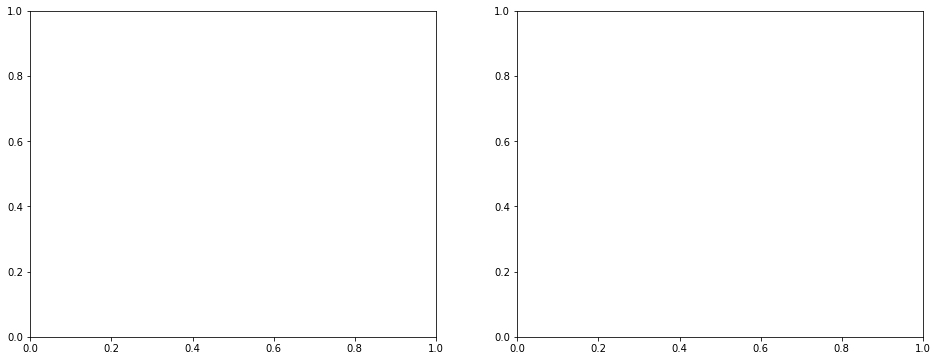

In [109]:
fig,axs = plt.subplots(1,2, figsize=(16,6))
plt.show()

In [4]:
import torch
import time

In [5]:
mha = torch.nn.MultiheadAttention(embed_dim=300, num_heads=4)

In [5]:
t = torch.rand(16, 231, 50, 300)
t.unbind(0)

(tensor([[[0.4528, 0.1177, 0.7919,  ..., 0.3795, 0.6174, 0.0556],
          [0.4578, 0.7870, 0.5661,  ..., 0.3707, 0.3332, 0.1420],
          [0.3248, 0.5166, 0.3897,  ..., 0.8336, 0.3317, 0.9148],
          ...,
          [0.2347, 0.3776, 0.6044,  ..., 0.4527, 0.7537, 0.4787],
          [0.9653, 0.3149, 0.3924,  ..., 0.0906, 0.3860, 0.8815],
          [0.4800, 0.4321, 0.1986,  ..., 0.2007, 0.4208, 0.0425]],
 
         [[0.5977, 0.1451, 0.4523,  ..., 0.6760, 0.3188, 0.8947],
          [0.7544, 0.4288, 0.7299,  ..., 0.8846, 0.0251, 0.3503],
          [0.1997, 0.8275, 0.7095,  ..., 0.7691, 0.7341, 0.6790],
          ...,
          [0.2516, 0.0417, 0.6034,  ..., 0.8417, 0.8125, 0.4713],
          [0.0997, 0.6748, 0.9180,  ..., 0.2086, 0.6720, 0.3636],
          [0.3352, 0.0558, 0.2586,  ..., 0.8696, 0.6281, 0.7120]],
 
         [[0.8292, 0.3755, 0.7062,  ..., 0.1954, 0.5503, 0.0094],
          [0.1773, 0.7682, 0.0546,  ..., 0.5685, 0.1845, 0.2697],
          [0.2011, 0.9650, 0.6560,  ...,

In [7]:
%%time
t = torch.rand(16, 231, 50, 300)
res = torch.empty(16, 231, 300)
for i in range(16):
    b = t[i]
    res[i]= mha(b,b,b)[0][:, 0, :]

CPU times: user 36.4 s, sys: 2.99 s, total: 39.3 s
Wall time: 6.08 s


In [8]:
res.shape

torch.Size([16, 231, 300])

In [ ]:
%%time
t = torch.rand(16, 231, 50, 300)
t= t.flatten(0,1)
mha(t,t,t)

In [3]:
pred_df = pd.read_pickle('/Users/akshaykekuda/Desktop/CSR-SA/server_logs/ak_3.5_27/fold_0_call_score_test.p')

In [6]:
pred_df = pred_df.set_index('id')

In [7]:
pred_df

Pred Cross Selling  Pred Creates Incentive  \
id                                                               
100175643180200503                   1                       1   
300145371120191222                   1                       1   
200105531250210414                   0                       0   
100188403940200813                   1                       1   
100103166450210212                   1                       0   
...                                ...                     ...   
300114419280200527                   0                       0   
100150350440200116                   1                       0   
2001670163C0200710                   1                       1   
200120774770210304                   1                       0   
100142704350210402                   1                       1   

                    Pred Education  Pred Processes  True Cross Selling  \
id                                                                       
100175643180200503               1               1                   1   
300145371120191222               1               1                   1   
200105531250210414               0               0                   0   
100188403940200813               1               1                   0   
100103166450210212               1               1                   0   
...                            ...             ...                 ...   
300114419280200527               0               0                   1   
100150350440200116               1               1                   1   
2001670163C0200710               1               1                   1   
200120774770210304               0               0                   0   
100142704350210402               1               1                   0   

                    True Creates Incentive  True Education  True Processes  \
id                                                                           
100175643180200503                       1               1               1   
300145371120191222                       1               1               1   
200105531250210414                       0               0               0   
100188403940200813                       1               0               1   
100103166450210212                       0               0               0   
...                                    ...             ...             ...   
300114419280200527                       0               1               1   
100150350440200116                       0               1               1   
2001670163C0200710                       1               1               1   
200120774770210304                       0               0               0   
100142704350210402                       1               0               1   

                    RawProba Cross Selling  RawProba Creates Incentive  \
id                                                                       
100175643180200503                0.809722                    0.835243   
300145371120191222                0.766317                    0.841158   
200105531250210414                0.384108                    0.458256   
100188403940200813                0.634921                    0.737896   
100103166450210212                0.605287                    0.346385   
...                                    ...                         ...   
300114419280200527                0.487508                    0.318908   
100150350440200116                0.639459                    0.286701   
2001670163C0200710                0.761617                    0.822626   
200120774770210304                0.520306                    0.268014   
100142704350210402                0.648249                    0.766741   

                    RawProba Education  RawProba Processes  \
id                                                           
100175643180200503            0.718035            0.765897   
300145371120191222            0.66

In [8]:
transcripts_dir = '/Users/akshaykekuda/Desktop/CSR-SA/manual_score_transcriptions/server_transcripts/'

def prepare_score_df(path_to_p, workgroup):
    with open(path_to_p, 'rb') as file:
        df = pickle.load(file)
    df = df.sort_values(by=['RecordingDate', 'QGroupSequence', 'QuestionSequence']).copy()
    cols = ['QGroupSequence', 'QGroupName', 'InteractionIdKey', 'QuestionSequence', 'QuestionText', 'QuestionType',
            'QuestionPromptType', 'QuestionWeight', 'QuestionMin', 'QuestionMax', 'AnswerScore', 'RawAnswer',
            'DisplayAnswer',
            'UserComments']
    if workgroup == 'all':
        calls_df = df[(df.QuestionnaireName == 'Call Interaction') & ((df.WorkgroupQueue == 'Customer Service') 
                                                                      |(df.WorkgroupQueue == 'Sales'))].copy()
    elif workgroup == 'CustomerService':
        calls_df = df[(df.QuestionnaireName == 'Call Interaction') & (df.WorkgroupQueue == 'Customer Service')].copy()
    elif workgroup == 'Sales':
        calls_df = df[(df.QuestionnaireName == 'Call Interaction') & (df.WorkgroupQueue == 'Sales')].copy()

    q_df = calls_df[cols]
    temp = q_df[0:10]
    temp = temp.reset_index(drop=True)
    q_text = []
    for index, row in temp.iterrows():
        q_text.append(row['QuestionText'])

    score_df = pd.DataFrame()
    score_df['WorkgroupQueue'] = calls_df.WorkgroupQueue[::10]
    score_df['RecordingDate'] = calls_df.RecordingDate[::10]
    # change baseline score range accordingly
    # overall score between 0 and 1
    score_df['CombinedPercentileScore'] = (calls_df.CombinedPercentileScore[::10]/100).astype(float).round(4)
    score_df['Category'] = (score_df['CombinedPercentileScore'] < 0.75).apply(lambda x: int(x))
    # overall score between 0 and 100
    # score_df['CombinedPercentileScore'] = (calls_df.CombinedPercentileScore[::10]).astype(float).round(2)
    # score_df['Category'] = (score_df['CombinedPercentileScore'] > 75).apply(lambda x: int(x))
    score_df.index = calls_df.InteractionIdKey[::10]
    calls_df.AnswerScore = calls_df.AnswerScore.astype('int')
    for i in range(10):
        criteria = q_text[i]
        q_max = int(calls_df.QuestionMax.iloc[i])
        score_df[criteria] = (calls_df.AnswerScore[i::10]).values
        score_df[criteria] = score_df[criteria].apply(lambda x: 0 if x >= q_max else 1) #used as binary class
        # score_df[criteria] = score_df[criteria].apply(lambda x: 1 if x >= q_max else 0) #used as binary class
        score_df[criteria + ' Feedback'] = (calls_df.UserComments[i::10]).values
    score_df = score_df.loc[~score_df.index.duplicated(keep='last')]
    print("Dataframe creation done")

    return score_df, q_text


def prepare_trancript_score_df(score_df, q_text, transcripts_dir):
    df = pd.DataFrame(columns=['text', 'file_name'])
    for file in os.listdir(transcripts_dir):
        if file.endswith('.txt'):
            file_loc = transcripts_dir + file
            f = open(file_loc, 'r')
            tscpt = f.read()
            f.close()
            if len(tscpt) == 0:
                print("empty file")
                continue
            id = re.split("_|-|\.", file)[1]
            if id in score_df.index:
                    df.loc[id, score_df.columns] = score_df.loc[id]
                    df.loc[id, ['text', 'file_name']] = [tscpt, file_loc]
    df.loc[:, q_text] = df.loc[:, q_text].astype(int)
    df = df[df['text'].notna()]
    print("Number of Calls = {}".format(len(df)))
    return df


def balance_df(df, num_samples):
    h = df[df.Category == 1].sample(n=num_samples//2)
    l = df[df.Category == 0].sample(n=num_samples//2)
    df_sampled = pd.concat((h,l))
    print("sampled df:", df_sampled.Category.value_counts())
    # h = len(df[df.Category == 1])
    # l = len(df) - h
    # temp = df[df.Category == 1].sample(h -l).index
    # df_sampled = df.drop(temp)
    # print('training and dev sample size = {} good ={} bad ={}'.format(len(df_sampled),l,l))
    # print('test sample size = {}'.format(len(df.loc[temp])))
    # remaining = df.index.difference(temp, sort=False)
    return df_sampled

score_df, q_text = prepare_score_df("/Users/akshaykekuda/Desktop/CSR-SA/attention_model/ScoringDetail_viw_all_subscore.p", 'all')

Dataframe creation done


In [41]:
score_df.loc[pred_df.index, :]['WorkgroupQueue'].value_counts()

Sales               620
Customer Service    397
Name: WorkgroupQueue, dtype: int64

In [27]:
df1 = pred_df[score_df.loc[pred_df.index, :]['WorkgroupQueue']=='Customer Service']
df2 = pred_df[score_df.loc[pred_df.index, :]['WorkgroupQueue']=='Sales']

In [37]:
categories = ['Cross Selling', 'Creates Incentive', 'Education', 'Processes']
from sklearn import metrics
for i in range(4):
    pred = df1.iloc[:, i]
    true = df1.iloc[:, i+4]
    auc = metrics.roc_auc_score(true, pred).round(2)
    f1 = metrics.f1_score(true, pred).round(2)
    crt = categories[i]
    print("AUC for {}={}".format(crt, auc))
    print("F1 for {}={}".format(crt, f1))    

AUC for Cross Selling=0.63
F1 for Cross Selling=0.47
AUC for Creates Incentive=0.55
F1 for Creates Incentive=0.21
AUC for Education=0.6
F1 for Education=0.36
AUC for Processes=0.55
F1 for Processes=0.3


In [38]:
for i in range(4):
    pred = df2.iloc[:, i]
    true = df2.iloc[:, i+4]
    auc = metrics.roc_auc_score(true, pred).round(2)
    f1 = metrics.f1_score(true, pred).round(2)
    crt = categories[i]
    print("AUC for {}={}".format(crt, auc))
    print("F1 for {}={}".format(crt, f1))    

AUC for Cross Selling=0.6
F1 for Cross Selling=0.82
AUC for Creates Incentive=0.67
F1 for Creates Incentive=0.82
AUC for Education=0.61
F1 for Education=0.78
AUC for Processes=0.64
F1 for Processes=0.83


In [39]:
for i in range(4):
    pred = pred_df.iloc[:, i]
    true = pred_df.iloc[:, i+4]
    auc = metrics.roc_auc_score(true, pred).round(2)
    f1 = metrics.f1_score(true, pred).round(2)
    crt = categories[i]
    print("AUC for {}={}".format(crt, auc))
    print("F1 for {}={}".format(crt, f1))    

AUC for Cross Selling=0.72
F1 for Cross Selling=0.76
AUC for Creates Incentive=0.78
F1 for Creates Incentive=0.77
AUC for Education=0.72
F1 for Education=0.72
AUC for Processes=0.72
F1 for Processes=0.75


In [31]:
f1 = metrics.f1_score(true, pred)

In [32]:
f1

0.7464539007092199